<a href="https://colab.research.google.com/github/JHyunjun/TF2.0_Deep-Learning-Mixture-Model/blob/main/CNN%2BKNN%20Mixture%20Model%20for%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝을 위한 가장 기본적인 데이터셋인 MNIST 데이터셋은 0 ~ 9까지의 숫자 손글씨를 저장해놓은 데이터 베이스이다.

![image.png](attachment:image.png)

MNIST 데이터 셋은 28x28의 1채널 흑백 영상이고 원본 데이터는 각 픽셀별 0 ~ 255까지 8bit 정수형 변수를 갖는다. 이를 일반적으로 활용할 때에는 픽셀별 값을 아래와 같이 0 ~ 1사이로 표준화 하여 사용한다. 

![image-2.png](attachment:image-2.png)

1. 아래와 같이 MNIST 데이터 셋을 TF 에서 다운로드 받으면 총 60000개의 학습용 데이터와 10000개의 검증용 데이터를 다운 받을 수 있다.

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [ ]:
# 1. MNIST 데이터셋 불러오기

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(f'x_train: {x_train.shape} & y_train: {y_train.shape} ')
print(f'x_test:  {x_test.shape}  & y_test:  {y_test.shape} ')

x_train: (60000, 28, 28) & y_train: (60000,) 
x_test:  (10000, 28, 28)  & y_test:  (10000,) 


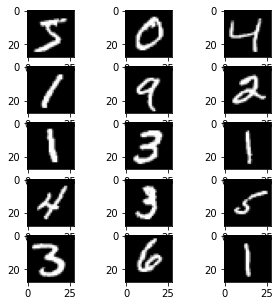

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [ ]:
# 2. 데이터 확인

plt.figure(figsize=(5, 5))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1
    
plt.show()

print(y_train[:15])

2. 위에서 다운받은 MNIST 데이터 셋중 학습용 데이터 셋을 이용하여 MNIST 데이터 셋을 분류할 수 있는 간단한 Covolutional Neural Network 분류기를 만들과, 검증용 데이터 셋으로 성능을 검증하시오.
 - 데이터 전처리 및 신경망의 모델은 사용자가 선택한 전략에 따라 구현하시오.

In [ ]:
# 1. 데이터 전처리하기
x_train_ = x_train.reshape((60000, 28, 28, 1))
x_train_ = x_train_ / 255.0
y_train_ = y_train 

x_test_  = x_test.reshape((10000, 28, 28, 1))
x_test_  = x_test_ / 255.0
y_test_  = y_test


# 2. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), name='feature_layer'))



# 3. Dense 층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

# 4. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 훈련하기
model.fit(x_train_, y_train_, epochs=5)

# 6. 모델 평가하기
loss, acc = model.evaluate(x_test_, y_test_, verbose=2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
feature_layer (MaxPooling2D) (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

3. 2번에서 구현한 MNIST 분류 CNN에서 Feature extraction 부분만을 이용하여, Feature extraction layer 뒤에 일반적인 Machine Learning 알고리즘(KNN, Decision Tree, SVM 및 다양한 Boosting 계열의 classifier)를 결합하여, MNIST DB를 구분하는 분류기를 구한한 뒤, Test data로 검증해보시오

In [ ]:
# 1. CNN 모델 중 Feature extraction 부분 추출
new_model = Model(inputs = model.input, outputs = model.get_layer('feature_layer').output)

x_train_feature_ = new_model.predict(x_train_)
x_test_feature_  = new_model.predict(x_test_)

x_train_feature_= x_train_feature_.reshape(x_train_feature_.shape[0],-1)
x_test_feature_ = x_test_feature_.reshape(x_test_feature_.shape[0],-1)


# 2. ML Classifier 구성하기
ML_model = KNeighborsClassifier()
#ML_model = DecisionTreeClassifier()

# 3.학습하기
ML_model.fit(x_train_feature_,y_train_)
ML_model.score(x_train_feature_,y_train_)


# 4. 평가하기
ML_model.score(x_test_feature_,y_test_)


0.9859